# Chapter 1: Getting Started with Python Machine Learning

- Name: Gyanas Luitel
- Group: Computer Science
- Roll No: 27

# Learning NumPy

In [1]:
import numpy

In [2]:
numpy.version.full_version

'1.19.2'

In [3]:
import numpy as np

In [4]:
a = np.array([0, 1, 2, 3, 4, 5])
a

array([0, 1, 2, 3, 4, 5])

In [5]:
a.ndim

1

In [6]:
a.shape

(6,)

In [7]:
b = a.reshape((3,2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [8]:
b.ndim

2

In [9]:
b.shape

(3, 2)

In [10]:
b[1][0] = 77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [11]:
a

array([ 0,  1, 77,  3,  4,  5])

In [12]:
c = a.reshape((3,2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [13]:
c[0][0] = -99
a

array([ 0,  1, 77,  3,  4,  5])

In [14]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [15]:
d = np.array([1, 2, 3, 4, 5])
d*2

array([ 2,  4,  6,  8, 10])

In [16]:
d**2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [17]:
[1, 2, 3, 4, 5] * 2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [18]:
[1, 2, 3, 4, 5] ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

## Indexing

In [19]:
a[np.array([2, 3, 4])]

array([77,  3,  4])

In [20]:
a > 4

array([False, False,  True, False, False,  True])

In [21]:
a[a > 4]

array([77,  5])

In [22]:
a[a > 4] = 4 
a

array([0, 1, 4, 3, 4, 4])

In [23]:
a.clip(0, 4)

array([0, 1, 4, 3, 4, 4])

## Handling nonexisting values

In [24]:
c = np.array([1, 2, np.NAN, 3, 4]) #let's pretend we have read this from a text file
c 

array([ 1.,  2., nan,  3.,  4.])

In [25]:
np.isnan(c)

array([False, False,  True, False, False])

In [26]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [27]:
np.mean(c[~np.isnan(c)])

2.5

## Comparing the runtime

In [28]:
import timeit

normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number =10000)

naive_np_sec = timeit.timeit('sum(na*na)', 
                             setup = "import numpy as np; na=np.arange(1000)", 
                             number = 10000)

good_np_sec = timeit.timeit('na.dot(na)', 
                            setup="import numpy as np; na=np.arange(1000)", 
                            number = 10000)

print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 1.315387 sec
Naive NumPy: 1.801854 sec
Good NumPy: 0.014761 sec


In [29]:
a = np.array([1, 2, 3])
a.dtype

dtype('int32')

In [30]:
np.array([1, "stringy"])

array(['1', 'stringy'], dtype='<U11')

In [31]:
np.array([1, "stringy", set([1,2,3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

# Learning SciPy

In [32]:
import scipy, numpy
scipy.version.full_version

'1.6.1'

In [33]:
scipy.dot is numpy.dot

False

# Our first (tiny) application of machine learning

## Reading in the data

In [34]:
import scipy as sp
data = np.genfromtxt("./Chapter01/data/web_traffic.tsv", delimiter="\t")

In [35]:
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [36]:
print(data.shape)

(743, 2)


## Preprocessing and cleaning the data

In [37]:
x = data[:,0]
y = data[:,1]

In [38]:
np.sum(np.isnan(y))

8

In [39]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

**plot 1: first impression of our data**

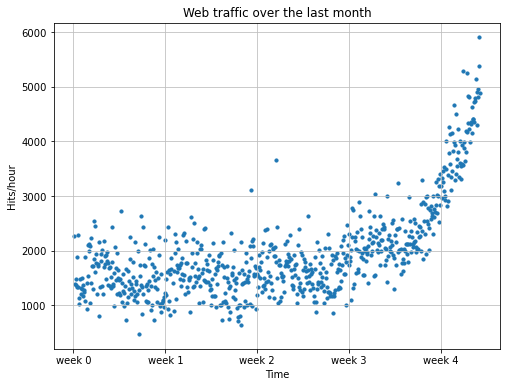

In [77]:
import matplotlib.pyplot as plt

#plot the (x,y) points with dots of size 10

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=10)

plt.title("Web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.xticks([w*7*24 for w in range(5)], ['week %i' % w for w in range(5)])

# plt.autoscale(tight = True)

#draw a slightly opaque, dashed grid

plt.grid(True, linestyle = "-", color="0.75")
plt.show()


## Choosing the right model and learning algorithm

#### Before building our first model...

In [41]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)

#### Starting with a simple straight line

In [42]:
fp1, residuals, rank, sv, rcond = np.polyfit(x, y, 1, full = True)

In [43]:
print("Model parameters: %s" % fp1)

Model parameters: [  2.59619213 989.02487106]


In [44]:
print(residuals)

[3.17389767e+08]


In [45]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.33977807


**plot 2**

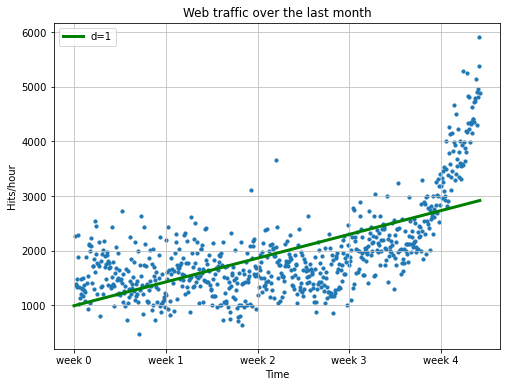

In [130]:
plt.figure(figsize=(8,6))

fx = np.linspace(0, x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth = 3, c="green")
plt.legend(["d=%i" % f1.order], loc="upper left")


plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(5)], ['week %i' % w for w in range(5)])
# plt.autoscale(tight = True)

#draw a slightly opaque, dashed grid

plt.grid(True, linestyle = "-", color="0.75")
plt.show()

### Towards some advanced stuff

**Fitting a more complex model, a ploynomial of degree 2**

In [47]:
f2p = np.polyfit(x, y, 2)
print(f2p)

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [49]:
f2 = np.poly1d(f2p)
print(error(f2, x, y))

179983507.8781792


**plot 3**

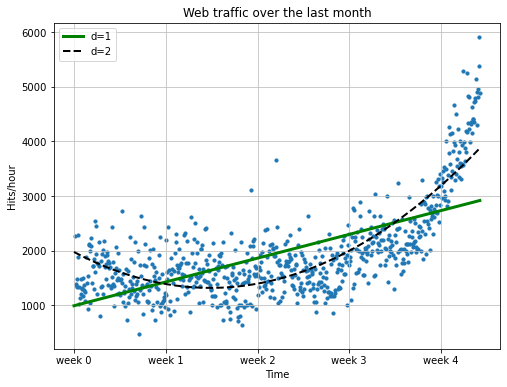

In [140]:
plt.figure(figsize=(8,6))

plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(5)],['week %i' % w for w in range(5)])
# plt.autoscale(tight=True)

fx = np.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth = 3, label = 'd=1', c="green")
plt.plot(fx, f2(fx), linewidth = 2, linestyle = "--", label='d=2', c="k")
plt.legend(loc="upper left")
plt.grid(True, linestyle='-', color='0.75')

**for polynomial of degrees 3, 10 and 1000**

C:\Users\gluit\anaconda3\envs\MLAssignment\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


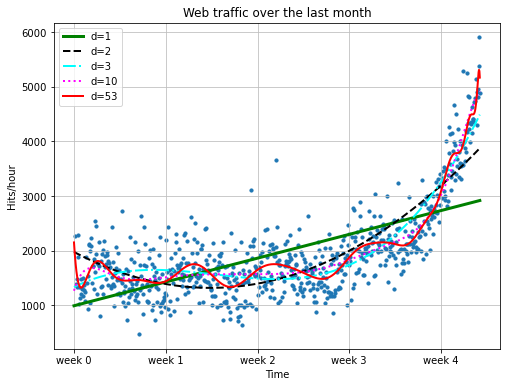

In [141]:
plt.figure(figsize=(8,6))

f3p = np.polyfit(x, y, 3)
f3 = sp.poly1d(f3p)

f10p = np.polyfit(x, y, 10)
f10 = sp.poly1d(f10p)

f53p = np.polyfit(x, y, 53)
f53 = sp.poly1d(f53p)

fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=3, c="green")


plt.plot(fx, f2(fx),"--",linewidth=2, c="black")


plt.plot(fx, f3(fx), linestyle = "-.", linewidth=2, c="cyan")

plt.plot(fx, f10(fx), linestyle="dotted", linewidth=2, c="magenta")


plt.plot(fx, f53(fx), linestyle="-", linewidth=2, c="red")

plt.legend(["d=%i" % f1.order,"d=%i" % f2.order,"d=%i" % f3.order,"d=%i" % f10.order,"d=%i" % f53.order], loc="upper left")
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(5)],['week %i' % w for w in range(5)])
# plt.autoscale(tight=True)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')

plt.show()

In [89]:
print("Error d=%i: %f" %(f1.order,error(f1, x, y)))
print("Error d=%i: %f" %(f2.order,error(f2, x, y)))
print("Error d=%i: %f" %(f3.order,error(f3, x, y)))
print("Error d=%i: %f" %(f10.order,error(f10, x, y)))
print("Error d=%i: %f" %(f53.order,error(f53, x, y)))

Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363474
Error d=53: 109452413.421278


### Stepping back to go forward - another look at our data

In [92]:
inflection = int(3.5 * 7 * 24) #calculate the inflection point in hours
inflection

588

In [145]:
xa = x[:inflection] #data before the inlfection point
ya = y[:inflection]

xb = x[inflection:] #data after
yb = y[inflection:]

fa= sp.poly1d(np.polyfit(xa, ya, 1))
fb = sp.poly1d(np.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)

print("Error inflection = %f" % (fa_error + fb_error))

Error inflection = 132950348.197616


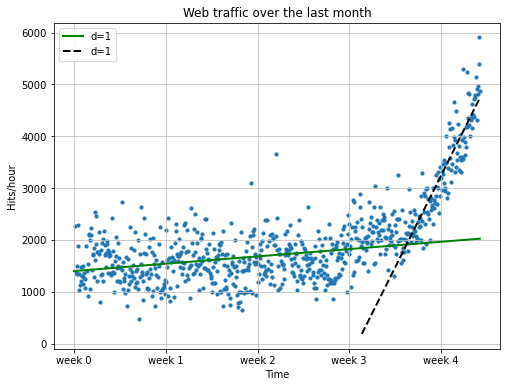

In [105]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
labels2 = []

ax2.scatter(x, y, s=10)  # s is the dot size

plt.title("Web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.xticks([w*7*24 for w in range(5)],
           ['week %i' % w for w in range(5)])

# plt.autoscale(tight=True)

fxa = np.linspace(0, xb[-1], 1000) # generate X-values for plotting
fxb = np.linspace(xa[-70], xb[-1], 1000) # generate X-values for plotting

ax2.plot(fxa, fa(fxa), linewidth=2, c="green")
labels2.append("d=%i" % fa.order)

ax2.plot(fxb, fb(fxb), linestyle="--", linewidth=2, c="black")
labels2.append("d=%i" % fb.order)

ax2.legend(labels2, loc="upper left")

plt.grid(True, linestyle='-', color='0.75')

**Plotting the models into the future**

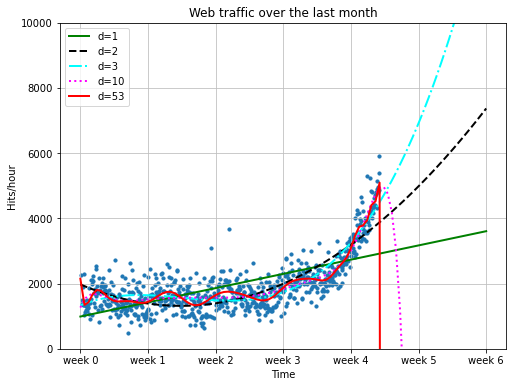

In [142]:
fig3, ax3 = plt.subplots(figsize=(8, 6))

ax3.scatter(x, y, s=10)  # s is the dot size

plt.title("Web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/hour")

labels3 = []

# generate X-values for plotting up to 6 weeks
fx = np.linspace(0, 6 * 7 * 24, 100) 

ax3.plot(fx, f1(fx), linewidth=2, c="green")
labels3.append("d=%i" % f1.order)

ax3.plot(fx, f2(fx), linestyle="--", linewidth=2, c="black")
labels3.append("d=%i" % f2.order)

colors = ["cyan", "magenta", "red"]
l_style = ["-.", "dotted", '-']

for fn, c, ls in zip(fnp, colors, l_style):
    labels3.append("d=%i" % fn.order)
    ax3.plot(fx, fn(fx), linestyle=ls, linewidth=2, c=c)

ax3.legend(labels3, loc="upper left")

plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])

plt.ylim(ymin=0, ymax=10000)

plt.grid(True, linestyle='-', color='0.75')

**Fitting the models only to the data of the last week**

In [110]:
fnp_b = []
for idx, degree in enumerate([1, 2, 3, 10, 100]):
    func = scipy.poly1d(np.polyfit(xb, yb, degree))
    fnp_b.append(func)
    print(f"error d={func.order} : {error(func, xb, yb)}")

error d=1 : 22143941.107618243
error d=2 : 19768846.98917637
error d=3 : 19766452.361026973
error d=10 : 18949296.733070232
error d=53 : 18300664.87009144


C:\Users\gluit\anaconda3\envs\MLAssignment\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gluit\anaconda3\envs\MLAssignment\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


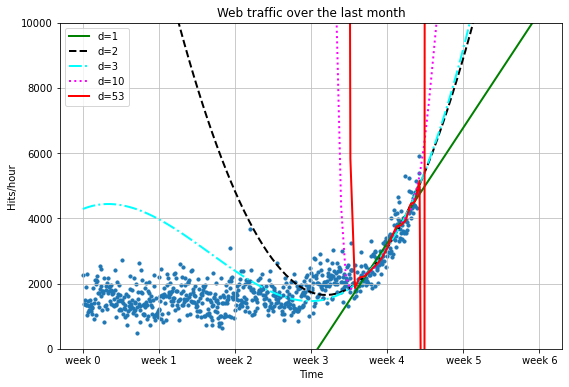

In [143]:
fig4, ax4 = plt.subplots(figsize=(9, 6))

ax4.scatter(x, y, s=10)  # s is the dot size

plt.title("Web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/hour")

labels4 = []

# generate X-values for plotting up to 6 weeks
fx = np.linspace(0, 6 * 7 * 24, 100) 

colors = ["green", "black", "cyan", "magenta", "red"]
l_style = ["-", "--", "-.", "dotted", '-']

for fn, c, ls in zip(fnp_b, colors, l_style):
    labels4.append("d=%i" % fn.order)
    ax4.plot(fx, fn(fx), linestyle=ls, linewidth=2, c=c)

ax4.legend(labels4, loc="upper left")

plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])

plt.ylim(ymin=0, ymax=10000)

plt.grid(True, linestyle='-', color='0.75')

### Training and testing

In [116]:
frac = 0.3
split_idx = int(frac * len(xb))
np.random.seed(3)
shuffled = np.random.permutation(list(range(len(xb))))
test_idx = sorted(shuffled[:split_idx])
train_idx = sorted(shuffled[split_idx:])

**Test Error for 1, 2, 3, 10, 100 degrees**

In [119]:
fnp_b_trained = []
for idx, degree in enumerate([1, 2, 3, 10, 100]):
    func = sp.poly1d(np.polyfit(xb[train_idx], yb[train_idx], degree))
    fnp_b_trained.append(func)
    print(f"Error d={func.order}: {error(func, xb[test_idx], yb[test_idx])}")

Error d=1: 6397694.386394179
Error d=2: 6010775.401243393
Error d=3: 6047678.658525205
Error d=10: 7037715.48677963
Error d=53: 7052572.062845796


C:\Users\gluit\anaconda3\envs\MLAssignment\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gluit\anaconda3\envs\MLAssignment\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


- Note: The model with degree 2 has the lowest test error.

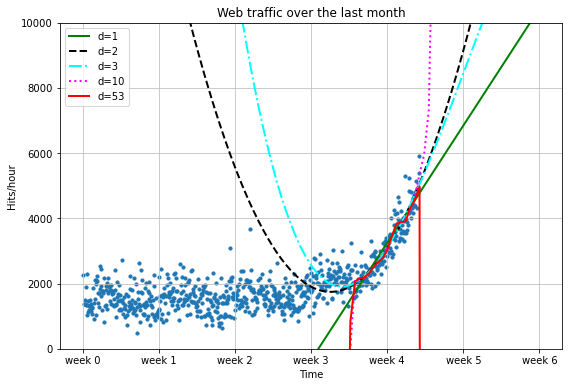

In [144]:
fig4, ax4 = plt.subplots(figsize=(9, 6))

ax4.scatter(x, y, s=10)  # s is the dot size

plt.title("Web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/hour")

labels4 = []

# generate X-values for plotting up to 6 weeks
fx = np.linspace(0, 6 * 7 * 24, 100) 

colors = ["green", "black", "cyan", "magenta", "red"]
l_style = ["-", "--", "-.", "dotted", '-']

for fn, c, ls in zip(fnp_b_trained, colors, l_style):
    labels4.append("d=%i" % fn.order)
    ax4.plot(fx, fn(fx), linestyle=ls, linewidth=2, c=c)

ax4.legend(labels4, loc="upper left")

plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])

plt.ylim(ymin=0, ymax=10000)

plt.grid(True, linestyle='-', color='0.75')

### Answering our inital question

In [123]:
fbt2 = sp.poly1d(np.polyfit(xb[train_idx], yb[train_idx], 2))
print("fbt2(x)= \n%s" % fbt2)

fbt2(x)= 
       2
0.086 x - 94.02 x + 2.744e+04


In [125]:
print("fbt2(x) - 100000= \n%s" % (fbt2 - 100000))

fbt2(x) - 100000= 
       2
0.086 x - 94.02 x - 7.256e+04


In [128]:
from scipy.optimize import fsolve
reached_max = fsolve(fbt2 - 100000, x0=800) / (7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 9.616071
